# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [46]:
from __future__ import print_function, division

import nsfg

## Examples from Chapter 1

Read NSFG data into a Pandas DataFrame.

In [47]:
preg = nsfg.ReadFemPreg()
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


Print the column names.

In [48]:
preg.columns

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)

Select a single column name.

In [49]:
preg.columns[1]

'pregordr'

Select a column and check what type it is.

In [50]:
pregordr = preg['pregordr']
type(pregordr)

pandas.core.series.Series

Print a column.

In [51]:
pregordr

0        1
1        2
2        1
3        2
4        3
        ..
13588    1
13589    2
13590    3
13591    4
13592    5
Name: pregordr, Length: 13593, dtype: int64

Select a single element from a column.

In [52]:
pregordr[0]

1

Select a slice from a column.

In [53]:
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

Select a column using dot notation.

In [54]:
pregordr = preg.pregordr

Count the number of times each value occurs.

In [55]:
preg.outcome.value_counts().sort_index()

1    9148
2    1862
3     120
4    1921
5     190
6     352
Name: outcome, dtype: int64

Check the values of another variable.

In [56]:
preg.birthwgt_lb.value_counts().sort_index()

0.0        8
1.0       40
2.0       53
3.0       98
4.0      229
5.0      697
6.0     2223
7.0     3049
8.0     1889
9.0      623
10.0     132
11.0      26
12.0      10
13.0       3
14.0       3
15.0       1
Name: birthwgt_lb, dtype: int64

Make a dictionary that maps from each respondent's `caseid` to a list of indices into the pregnancy `DataFrame`.  Use it to select the pregnancy outcomes for a single respondent.

In [57]:
caseid = 10229
preg_map = nsfg.MakePregMap(preg)
indices = preg_map[caseid]
preg.outcome[indices].values

array([4, 4, 4, 4, 4, 4, 1], dtype=int64)

## Exercises 1-1

Select the `birthord` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [58]:
# Solution goes here
preg.birthord.value_counts().sort_index()

1.0     4413
2.0     2874
3.0     1234
4.0      421
5.0      126
6.0       50
7.0       20
8.0        7
9.0        2
10.0       1
Name: birthord, dtype: int64

We can also use `isnull` to count the number of nans.

In [59]:
preg.birthord.isnull().sum()

4445

Select the `prglngth` column, print the value counts, and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [60]:
# Solution goes here
preg.prglngth.value_counts().sort_index()

0       15
1        9
2       78
3      151
4      412
5      181
6      543
7      175
8      409
9      594
10     137
11     202
12     170
13     446
14      29
15      39
16      44
17     253
18      17
19      34
20      18
21      37
22     147
23      12
24      31
25      15
26     117
27       8
28      38
29      23
30     198
31      29
32     122
33      50
34      60
35     357
36     329
37     457
38     609
39    4744
40    1120
41     591
42     328
43     148
44      46
45      10
46       1
47       1
48       7
50       2
Name: prglngth, dtype: int64

To compute the mean of a column, you can invoke the `mean` method on a Series.  For example, here is the mean birthweight in pounds:

In [61]:
preg.totalwgt_lb.mean()

7.265628457623368

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [62]:
# Solution goes here

#In order to convert pounds to kilograms, we have to divide the values by 2.2
preg['totalwgt_kg']=preg.totalwgt_lb/2.2

#Findiing the mean of the totalwgt_kg column
preg.totalwgt_kg.mean()

3.302558389828807

`nsfg.py` also provides `ReadFemResp`, which reads the female respondents file and returns a `DataFrame`:

In [63]:
resp = nsfg.ReadFemResp()

`DataFrame` provides a method `head` that displays the first five rows:

In [64]:
resp.head()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667


Select the `age_r` column from `resp` and print the value counts.  How old are the youngest and oldest respondents?

In [65]:
# Solution goes here
resp.age_r.value_counts().sort_index()

15    217
16    223
17    234
18    235
19    241
20    258
21    267
22    287
23    282
24    269
25    267
26    260
27    255
28    252
29    262
30    292
31    278
32    273
33    257
34    255
35    262
36    266
37    271
38    256
39    215
40    256
41    250
42    215
43    253
44    235
Name: age_r, dtype: int64

Youngest respondent: 15 years old <br>
Oldest respondent: 44 years old

We can use the `caseid` to match up rows from `resp` and `preg`.  For example, we can select the row from `resp` for `caseid` 2298 like this:

In [66]:
resp[resp.caseid==2298]

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667


And we can get the corresponding rows from `preg` like this:

In [67]:
#Selecting the row from preg for caseid 2298
preg[preg.caseid==2298]

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb,totalwgt_kg
2610,2298,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000
2611,2298,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,5.5000,2.500000
2612,2298,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,4.1875,1.903409
2613,2298,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,3247.916977,5123.759559,5556.717241,2,18,NaN,6.8750,3.125000


How old is the respondent with `caseid` 1?

In [68]:
# Solution goes here
resp[resp.caseid==1].age_r

#The respondent with caseid = 1 is 44 years old

1069    44
Name: age_r, dtype: int64

What are the pregnancy lengths for the respondent with `caseid` 2298?

In [69]:
# Solution goes here

#Selecting the prglngth variable for the respondent with caseid 2298 from preg
preg[preg.caseid==2298].prglngth

2610    40
2611    36
2612    30
2613    40
Name: prglngth, dtype: int64

What was the birthweight of the first baby born to the respondent with `caseid` 5012?

In [70]:
# Solution goes here

#Getting the birthwgt_lb value for the first baby born to the respondent with caseid 5012
preg[(preg.caseid==5012) & (preg.pregordr==1)].birthwgt_lb

5515    6.0
Name: birthwgt_lb, dtype: float64

# Exercise 1-2

In [71]:
"""This file contains code for use with "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2010 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function, division

import sys
import numpy as np
import thinkstats2

from collections import defaultdict


def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    """Reads the NSFG respondent data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip', nrows=nrows)
    CleanFemResp(df)
    return df


def CleanFemResp(df):
    """Recodes variables from the respondent frame.

    df: DataFrame
    """
    pass


def ReadFemPreg(dct_file='2002FemPreg.dct',
                dat_file='2002FemPreg.dat.gz'):
    """Reads the NSFG pregnancy data.

    dct_file: string file name
    dat_file: string file name

    returns: DataFrame
    """
    dct = thinkstats2.ReadStataDct(dct_file)
    df = dct.ReadFixedWidth(dat_file, compression='gzip')
    CleanFemPreg(df)
    return df


def CleanFemPreg(df):
    """Recodes variables from the pregnancy frame.

    df: DataFrame
    """
    # mother's age is encoded in centiyears; convert to years
    df.agepreg /= 100.0

    # birthwgt_lb contains at least one bogus value (51 lbs)
    # replace with NaN
    df.loc[df.birthwgt_lb > 20, 'birthwgt_lb'] = np.nan
    
    # replace 'not ascertained', 'refused', 'don't know' with NaN
    na_vals = [97, 98, 99]
    df.birthwgt_lb.replace(na_vals, np.nan, inplace=True)
    df.birthwgt_oz.replace(na_vals, np.nan, inplace=True)
    df.hpagelb.replace(na_vals, np.nan, inplace=True)

    df.babysex.replace([7, 9], np.nan, inplace=True)
    df.nbrnaliv.replace([9], np.nan, inplace=True)

    # birthweight is stored in two columns, lbs and oz.
    # convert to a single column in lb
    # NOTE: creating a new column requires dictionary syntax,
    # not attribute assignment (like df.totalwgt_lb)
    df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0    

    # due to a bug in ReadStataDct, the last variable gets clipped;
    # so for now set it to NaN
    df.cmintvw = np.nan


def ValidatePregnum(resp, preg):
    """Validate pregnum in the respondent file.

    resp: respondent DataFrame
    preg: pregnancy DataFrame
    """
    # make the map from caseid to list of pregnancy indices
    preg_map = MakePregMap(preg)
    
    # iterate through the respondent pregnum series
    for index, pregnum in resp.pregnum.iteritems():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            return False

    return True


def MakePregMap(df):
    """Make a map from caseid to list of preg indices.

    df: DataFrame

    returns: dict that maps from caseid to list of indices into `preg`
    """
    d = defaultdict(list)
    for index, caseid in df.caseid.iteritems():
        d[caseid].append(index)
    return d


def main():
    """Tests the functions in this module.

    script: string script name
    """
    # read and validate the respondent file
    resp = ReadFemResp()
    
    #read and validate the pregnancy file
    preg = ReadFemPreg()
    
    #Print value counts for the pregnum variable
    print("-------------Pregnum value counts---------------")
    valPregnum = resp.pregnum.value_counts().sort_index()
    print(valPregnum)
    print("------------------------------------------------")
    
    #comparing to published results in codebook
    print("Does the number of values in the respondent files = 7643? ", len(resp) == 7643)
    print("Does the fourth value in the value counts = 1110? ", resp.pregnum.value_counts()[3] == 1110)
    print("Validate Pregnum function: ", ValidatePregnum(resp,preg))


if __name__ == '__main__':
    main()

-------------Pregnum value counts---------------
0     2610
1     1267
2     1432
3     1110
4      611
5      305
6      150
7       80
8       40
9       21
10       9
11       3
12       2
14       2
19       1
Name: pregnum, dtype: int64
------------------------------------------------
Does the number of values in the respondent files = 7643?  True
Does the fourth value in the value counts = 1110?  True
Validate Pregnum function:  True


# Excercise 2-1

If I wanted to get a story on the evening news, I would use the summary statistics of effect size or Cohen's d. These statistics allow us to see differences between groups, and for the evening news, viewers would want to know how the effect of a first baby arriving late differs from a first baby that arrives on time or even early. What is that difference? What is its magnitude? People watching the evening news want to know the grandness of an issue or story. 

On the other hand, for reassuring an anxious patient, I would use the more discrete and personal summary statistics of mean and variance, as they would allow the patient to understand their own case in the context of the information collected on them, rather than of other people. We would want the information shared with the patient to be more personal, honest, and relatable, and mean/variance would give the patient a good idea of their pregnancy and delivery.

Cecil Adams here! 
When comparing the distribution of pregnancy lengths for first babies and others, it is apparent that the most common value for these two groups falls around ~39 weeks, which is the beginning marker of a full-term of pregnancy; this is regardless of the first baby or other numbered baby being born. The values for pregnancy length seem most centered around that healthy full-term pregnancy length. 
Also, from finding the mean and variance of pregnancy length for all live births, the mean pregnancy length is 38.6 weeks and the standard deviation or variance is 2.7 weeks. The mean length is again right around that full-term length, and variation of 2-3 weeks in pregnancy length is common as well. 
With a late pregnancy being around ~42 weeks, it can be drawn from these statistics that first babies do not arrive late, as even the average values and spread of this value, show that most babies will stay within full-term or early-term pregnancies. 

# Exercise 2.4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen's d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [72]:
import thinkplot
import thinkstats2
#Reading the data and selecting records for live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

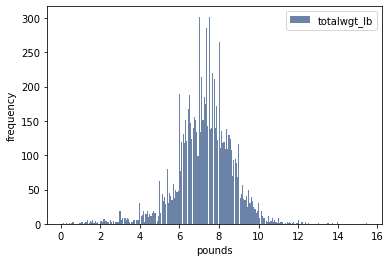

<Figure size 576x432 with 0 Axes>

In [73]:
hist = thinkstats2.Hist(live.totalwgt_lb,label='totalwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds',ylabel='frequency')

In [74]:
#Getting 10 smallest & 10 highest values from the hist

print("10 smallest weights")
for weight,freq in hist.Smallest(10):
    print(weight,freq)
  
print("\n10 largest weights")
for weight,freq in hist.Largest(10):
    print(weight,freq)

10 smallest weights
0.125 1
0.3125 1
0.4375 1
0.5625 1
0.625 2
0.9375 1
1.0 1
1.0625 3
1.125 2
1.1875 1

10 largest weights
15.4375 1
14.0 3
13.75 1
13.5 1
13.0 1
12.5 1
12.375 2
12.1875 2
12.0 5
11.9375 1


1. 15-pound baby ... ow!
2. My domain knowledge is not great on pregnancies, but it seems very scary for a baby to be born at 0.125 pounds; these lower weights are more likely from very premature pregnancies and the babies may struggle with gaining strength and body functionality. 
3. I would say these are outliers that capture accurate reports of rare events at the smaller and much larger scale. 

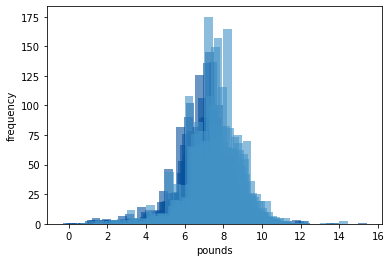

<Figure size 576x432 with 0 Axes>

In [75]:
#Pulling records for first babies and other babies
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]


#Comparing distribution of birth weights for first babies and others
first_hist = thinkstats2.Hist(firsts.totalwgt_lb)
other_hist = thinkstats2.Hist(others.totalwgt_lb)

#Plotting
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist,align='right',width=width)
thinkplot.Hist(other_hist,align='left',width=width)
thinkplot.Show(xlabel='pounds',ylabel='frequency')

#Much overlap between the two populations in terms of distribution in total birth weights

In [76]:
#Mean and variance summary statistics
mean = live.totalwgt_lb.mean()
var = live.totalwgt_lb.var()
std = live.totalwgt_lb.std()

print("Mean total birthweight: ",mean)
print("Variance in total birthweight: ",var)
print("Standard deviation in total birthweight: ",std)

#Expect deviations of ~2 pounds to be common

Mean total birthweight:  7.265628457623368
Variance in total birthweight:  1.9832904288326532
Standard deviation in total birthweight:  1.4082934455690168


In [77]:
#Mean and variance summary statistics for groups -- first babies vs. others
mean_first = firsts.totalwgt_lb.mean()
var_first = firsts.totalwgt_lb.var()
std_first = firsts.totalwgt_lb.std()

mean_others = others.totalwgt_lb.mean()
var_others = others.totalwgt_lb.var()
std_others = others.totalwgt_lb.std()

print("------------First babies------------------")
print("Mean total birthweight: ",mean_first)
print("Variance in total birthweight: ",var_first)
print("Standard deviation in total birthweight: ",std_first)

print("\n------------Other babies------------------")
print("Mean total birthweight: ",mean_others)
print("Variance in total birthweight: ",var_others)
print("Standard deviation in total birthweight: ",std_others)

------------First babies------------------
Mean total birthweight:  7.201094430437772
Variance in total birthweight:  2.0180273009157768
Standard deviation in total birthweight:  1.4205728777207374

------------Other babies------------------
Mean total birthweight:  7.325855614973262
Variance in total birthweight:  1.9437810258964572
Standard deviation in total birthweight:  1.3941954762143138


Difference in mean birthweights for first vs. others: 7.20 - 7.33 = -0.13 pounds
When comparing means, it would seem that first babies tend to be lighter than others, but a difference of .13 pounds will not make a huge difference for the babies that are around that average weight of 7.2 pounds. It can make a difference at the extremes though. 

In [78]:
import math
#Cohen's d function
def CohenEffectSize(group1,group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1,n2 = len(group1),len(group2)
    
    pooled_var = (n1 * var1 + n2 * var2)/ (n1+n2)
    d = diff/math.sqrt(pooled_var)
    return d

In [79]:
#Cohen's d for total birthweight difference between firsts and others
print(CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb))

-0.088672927072602


The difference in means is -0.089 standard deviations, which shows that there is a negative effect size and the effect of being a first baby decreases the mean of the total birthweight. This would again show that first babies tend to be lighter than other babies, as being a first baby brings down the mean of the total birthweight value for the sample population. 

This Cohen's d value is greater than the one for pregnancy value, but it is negative, which provides a different perspective on the direction of the effect on your mean. The one for pregnancy length showed that the effect of being a first baby increases the mean pregnancy length, but for birthweight, it decreases the mean value. 